In [1]:
import numpy as np
import cv2
import matplotlib.image as image
import matplotlib.pyplot as plot
from PIL import Image, ImageEnhance, ImageFilter, ImageOps, ImageDraw

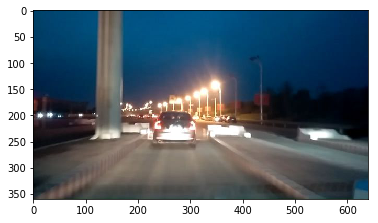

In [2]:
image_path = '../dataset/training/60134.jpg'
img = cv2.imread(image_path)
# img's format is BGR 

def show_image(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plot.imshow(image)
    plot.show()

show_image(img)

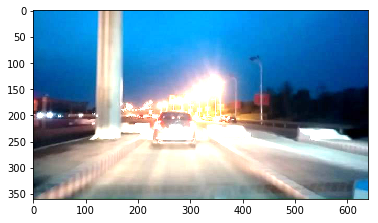

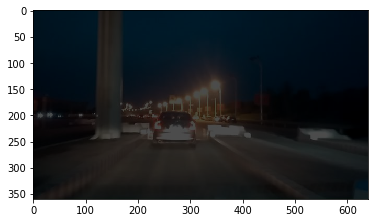

In [3]:
# Add brightness
def brightness():
    from PIL import ImageEnhance, Image
    image = Image.open('../dataset/training/60134.jpg')
    brt = ImageEnhance.Brightness(image)
    new_image = brt.enhance(2)
    plot.imshow(new_image)
    plot.show()
    new_image = brt.enhance(0.3)
    plot.imshow(new_image)
    plot.show()

brightness()


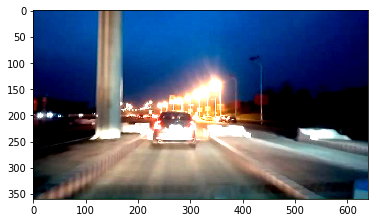

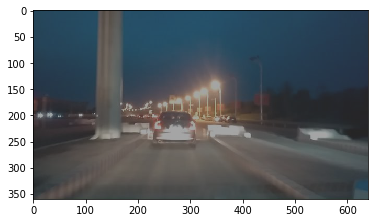

In [4]:
# Add contrast
def contrast():
    from PIL import ImageEnhance, Image
    image = Image.open('../dataset/training/60134.jpg')
    brt = ImageEnhance.Contrast(image)
    new_image = brt.enhance(2)
    plot.imshow(new_image)
    plot.show()
    new_image = brt.enhance(0.5)
    plot.imshow(new_image)
    plot.show()

contrast()

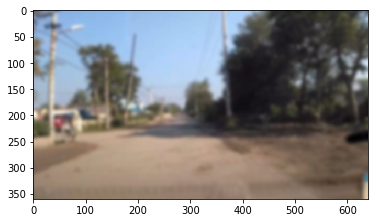

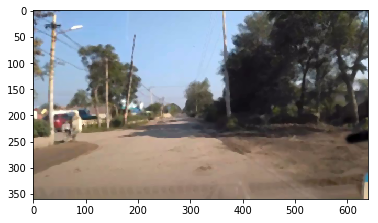

In [5]:
# Add blur
def blur():
    from PIL import Image, ImageFilter
    image = Image.open('../dataset/training/60092.jpg')
    new_image = image.filter(ImageFilter.GaussianBlur(3))
    plot.imshow(new_image)
    plot.show()
    new_image = image.filter(ImageFilter.MedianFilter(5))
    plot.imshow(new_image)
    plot.show()

blur()

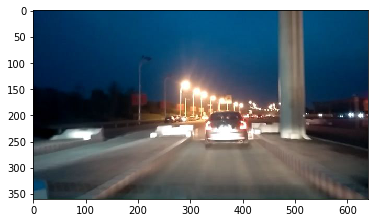

In [6]:
# Add mirror
def mirror():
    from PIL import Image, ImageOps
    image = Image.open('../dataset/training/60134.jpg')
    new_image = ImageOps.mirror(image)
    plot.imshow(new_image)
    plot.show()


mirror()

In [7]:
# Coordinate Convert After Mirror
def coordinate_transform(image_size, coordinate):
#     image_size = {'width': 640, 'height': 360}
#     coordinate = [100, 50, 420, 150, 1]
    top_left_x = image_size['width'] - coordinate[2]
    top_left_y = coordinate[1]
    bottom_right_x = image_size['width'] - coordinate[0]
    bottom_right_y = coordinate[3]
    new_cord = [top_left_x, top_left_y, bottom_right_x, bottom_right_y, coordinate[4]]
    return new_cord

image_size = {'width': 640., 'height': 360.}
org_cord = [100., 50., 420., 150., 1]
coordinate_transform(image_size, org_cord)

[220.0, 50.0, 540.0, 150.0, 1]

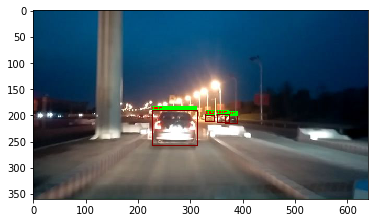

In [15]:

image = Image.open('../dataset/training/60134.jpg')
notations = [[228.49984, 190.00008, 313.83296, 258.00012000000004, 1], [367.24992, 200.75004, 390.99967999999996, 216.75024, 1], [352.74944, 198.74988, 374.2496, 215.49996, 1], [330.49984, 199.74996000000002, 346.50048, 213.4998, 1]]
draw = ImageDraw.Draw(image)
for notation in notations:
    draw.line([notation[0], notation[1], notation[2], notation[1]], fill=128, width=2)
    draw.line([notation[2], notation[1], notation[2], notation[3]], fill=128, width=2)
    draw.line([notation[2], notation[3], notation[0], notation[3]], fill=128, width=2)
    draw.line([notation[0], notation[3], notation[0], notation[1]], fill=128, width=2)
    # In testing, I add offset of (-10) on Y axis, but on the real world I need to check if the axis will be
    # off the picture; On that case will change the label to the bottom (y+height)+10; if it also overflow
    # the lable box could be put inside of the bounding box.
    draw.rectangle([notation[0], notation[1]-8, notation[2], notation[1]], outline='#00ff00', fill='#00ff00')
    draw.text((notation[0], notation[1]-10), "car", fill='#ff0000') # 65280 is decimal of #00FF00

plot.imshow(image)
plot.show()
# image.save('./image.png', "PNG")